# Python  - visualiseerimine ja masinõpe

## Sissejuhatus

**Kasutame koolituse käigus jupyter notebooki!**

Kõige olulisemad lühivalikud:
* ESC - "command mode" esc + klahv sisestab käsu
* ESC + Enter - käivita lahter (jooksutab koodi mis paikneb aktiivses lahtris)
* ESC + b - lisab lahtri alla
* ESC + m - Tekstisisetamise lahter (vaikimisi *Markdown* vorminduses)
* ESC + h - Kõik jupyteri lühivalikud hüpikanknas
* ; - rea lõpus peidab outputi

Jupyteris on viimane rida on alati väljundiga, st kui raku viimasel real on näiteks muutuja , siis trükitakse raku/lahtri alla tema väärtus. Viimasele reale kirjutatud "Hello world" on ekvivalentne print("Hello world")

**Kõik materjalid on tehtud Python3-ga**
Kood on testitud 3.6.5-ga aga iga 3.x peaks töötama. 2.x võib tekkida probleeme nii süntaksiga (kasvõi sellest alates et kõik print käsud tuleb ümber kirjutada, kuni selleni et kõik teegid ei pruugi töölegi minna, näiteks numpy ja pandas võivad anda konflikte ja mitte kompileeruda)

**Kasutatavad teegid**
* pandas  (0.23)
* numpy (1.15.4)
* matplotlib (2.2.2)
* seaborn (0.8.1)
* scipy (1.1.1)
* request (2.13.0)

## Andmete lugemine, esmane analüüs ja visualiseerimine 

Analüüsime korraks piiriülest voolu liikumist

In [1]:
import requests  
import pandas as pd

In [2]:

# api-endpoint 
URL = " http://dashboard.elering.ee/api/transmission/cross-border?"  
# API parameetrid
PARAMS = {'start':'2018-01-01 00:00', 'end': '2018-12-31 00:00'}  
PARAMS2 = {'start':'2018-01-01 00:00', 'end': '2018-12-31 00:00'}  

# GET request
r17 = requests.get(url = URL, params = PARAMS2) 
r = requests.get(url = URL, params = PARAMS) 
# extracting data in json format 
data17 = r17.json() 
data = r.json() 

Cross_border_df17 = pd.DataFrame.from_dict(data17['data'])

Cross_border_df = pd.DataFrame.from_dict(data['data'])
Cross_border_df.head(2)

,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp
0,-0.7736,-50.5667,-51.3403,278.5500,-173.3333,92.6459,1514764800
1,0.6140,-51.0000,-50.3860,300.8792,-201.7000,85.0588,1514765100


In [3]:
#Vaatame ka teist tabelit
Cross_border_df17.head(2)

,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp
0,-0.7736,-50.5667,-51.3403,278.5500,-173.3333,92.6459,1514764800
1,0.6140,-51.0000,-50.3860,300.8792,-201.7000,85.0588,1514765100


In [4]:
#Kiire ülevaate saamiseks
Cross_border_df.describe()

,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp
count,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,1.048320e+05
mean,-6.472693,-161.007192,-167.479884,368.505034,-30.726019,51.585038,1.530489e+09
std,87.760449,372.633609,422.452404,181.635336,196.314370,65.898188,9.078761e+06
min,-364.223600,-656.300000,-1014.113200,-360.367700,-767.733300,-146.168200,1.514765e+09
25%,-8.853900,-481.000000,-479.483325,253.392300,-171.554150,3.926100,1.522627e+09
50%,1.682400,-179.625000,-180.609450,382.981000,-16.466700,45.963300,1.530489e+09
75%,10.843200,47.200000,64.111075,501.725425,121.072900,91.859325,1.538352e+09
max,370.174600,672.233300,1033.990000,861.420200,529.100000,354.111500,1.546214e+09


In [5]:
Cross_border_df['date'] = pd.to_datetime(Cross_border_df['timestamp'], unit='s')
Cross_border_df.head(2)

,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp,date
0,-0.7736,-50.5667,-51.3403,278.5500,-173.3333,92.6459,1514764800,2018-01-01 00:00:00
1,0.6140,-51.0000,-50.3860,300.8792,-201.7000,85.0588,1514765100,2018-01-01 00:05:00


## Andmete salvestamine ja laadimine

Suhteliselt lihtne on andmeid salvestada ja laadida

Näited:
* .csv - otse loetav, laetav Excelisse, aeglane ja suur
* .pkl - binaarfail, tavaliselt võtab kõige vähem ruumi, loetamatu
* .h5py - kõige kiirem suurte mahtude juures, memorymapped failistruktuur, nõuab palju mälu



In [6]:
# Dataframeide kokkupanemine

print(Cross_border_df.shape)

frames = [Cross_border_df17, Cross_border_df]

Cross_border_df = pd.concat(frames)

print(Cross_border_df.shape)


(104832, 8)
(209664, 8)


/home/tiit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  import sys


In [7]:

Cross_border_df.to_csv('Cross_border_df.csv')
Cross_border_df.to_pickle('Cross_border_df.pkl')
Cross_border_df.to_hdf('Cross_border_df.h5', key='Cross_border_df', mode='w')

#Kuidas kustutada faile
import os
#os.remove("Cross_border_df.hdf")

!ls -l

kokku 45460
-rw-rw-r-- 1 tiit tiit 16279336 veebr 19 22:09  Cross_border_df.csv
-rw-rw-r-- 1 tiit tiit 15105096 veebr 19 22:09  Cross_border_df.h5
-rw-rw-r-- 1 tiit tiit 15096942 veebr 19 22:09  Cross_border_df.pkl
-rw-rw-r-- 1 tiit tiit    30166 veebr 19 22:09 'Elering intro to python.ipynb'
-rw-rw-r-- 1 tiit tiit    31208 veebr 12 16:04 'Elering tests.ipynb'


In [8]:
import time
start_time = time.time()

df = pd.read_pickle('Cross_border_df.pkl')
print(time.time()-start_time)

start_time = time.time()

df = pd.read_hdf('Cross_border_df.h5')
print(time.time()-start_time)

start_time = time.time()

df = pd.read_csv('Cross_border_df.csv')
print(time.time()-start_time)

0.020345211029052734
0.018316268920898438
0.23900556564331055


/home/tiit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df['date'] = pd.to_datetime(df['timestamp'], unit='s')

df.head(1)

,Unnamed: 0,date,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp
0,0,2018-01-01,-0.7736,-50.5667,-51.3403,278.55,-173.3333,92.6459,1514764800


In [10]:
df = df.drop(columns=['Unnamed: 0'])
df.head(2)




,date,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp
0,2018-01-01 00:00:00,-0.7736,-50.5667,-51.3403,278.5500,-173.3333,92.6459,1514764800
1,2018-01-01 00:05:00,0.6140,-51.0000,-50.3860,300.8792,-201.7000,85.0588,1514765100


In [11]:
#Lisame kuupäeva
#df['date'] = pd.to_datetime(df['timestamp'], unit='s')


#Summaarne üleminek
#Alternatiiv näiteks
#df.assign(my_sum=df[["estlink_1","estlink_2","finland","latvia", "russia_narva","russia_pihvka"]].sum(1))
df['net_transfer'] =   df.values[:, 1:5].sum(1)


In [12]:
# Alati mõistlik test
df.isnull().sum(axis = 0)

date             0
estlink_1        0
estlink_2        0
finland          0
latvia           0
russia_narva     0
russia_pihvka    0
timestamp        0
net_transfer     0
dtype: int64

In [13]:
df.dtypes

date             datetime64[ns]
estlink_1               float64
estlink_2               float64
finland                 float64
latvia                  float64
russia_narva            float64
russia_pihvka           float64
timestamp                 int64
net_transfer             object
dtype: object

In [14]:
# Muudame kuupäeva indeksiks

df.drop(['timestamp'], axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date'], drop=True)
df.head(10)


,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,net_transfer
date,,,,,,,
2018-01-01 00:00:00,-0.7736,-50.5667,-51.3403,278.5500,-173.3333,92.6459,175.869
2018-01-01 00:05:00,0.6140,-51.0000,-50.3860,300.8792,-201.7000,85.0588,200.107
2018-01-01 00:10:00,-0.3930,-16.6333,-17.0263,295.1209,-222.1667,79.4812,261.068
2018-01-01 00:15:00,-7.0241,51.1167,44.0926,288.0245,-273.8500,72.8570,376.21
2018-01-01 00:20:00,-1.3140,54.4667,53.1527,298.9832,-292.7167,76.1738,405.289
2018-01-01 00:25:00,-0.0737,54.4000,54.3263,299.7355,-279.0667,75.3039,408.388
2018-01-01 00:30:00,4.1629,54.4000,58.5629,293.5617,-277.7166,75.5644,410.688
2018-01-01 00:35:00,4.8629,54.4000,59.2629,301.8262,-281.3833,77.4809,420.352
2018-01-01 00:40:00,0.6386,54.4333,55.0719,301.9982,-269.2333,80.6163,412.142


In [16]:
# Change figure size

from pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 200


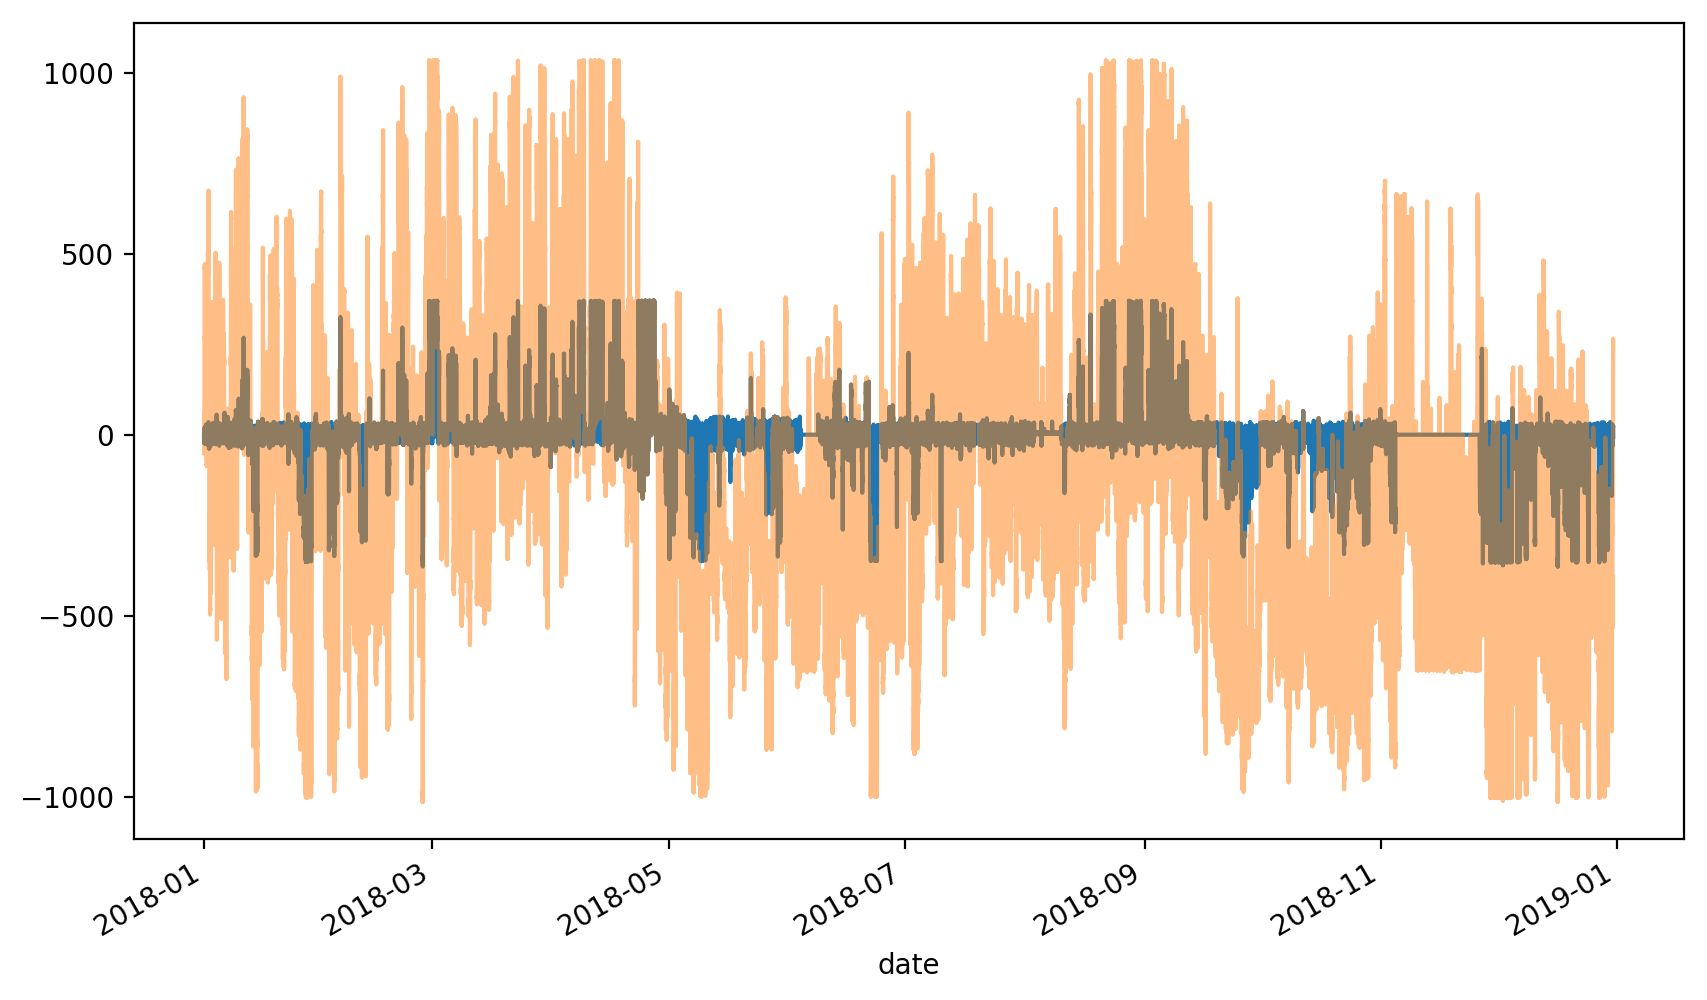

In [17]:


plt.figure(figsize=(10, 6))
df['estlink_1'].plot();
df['finland'].plot(alpha=0.5);

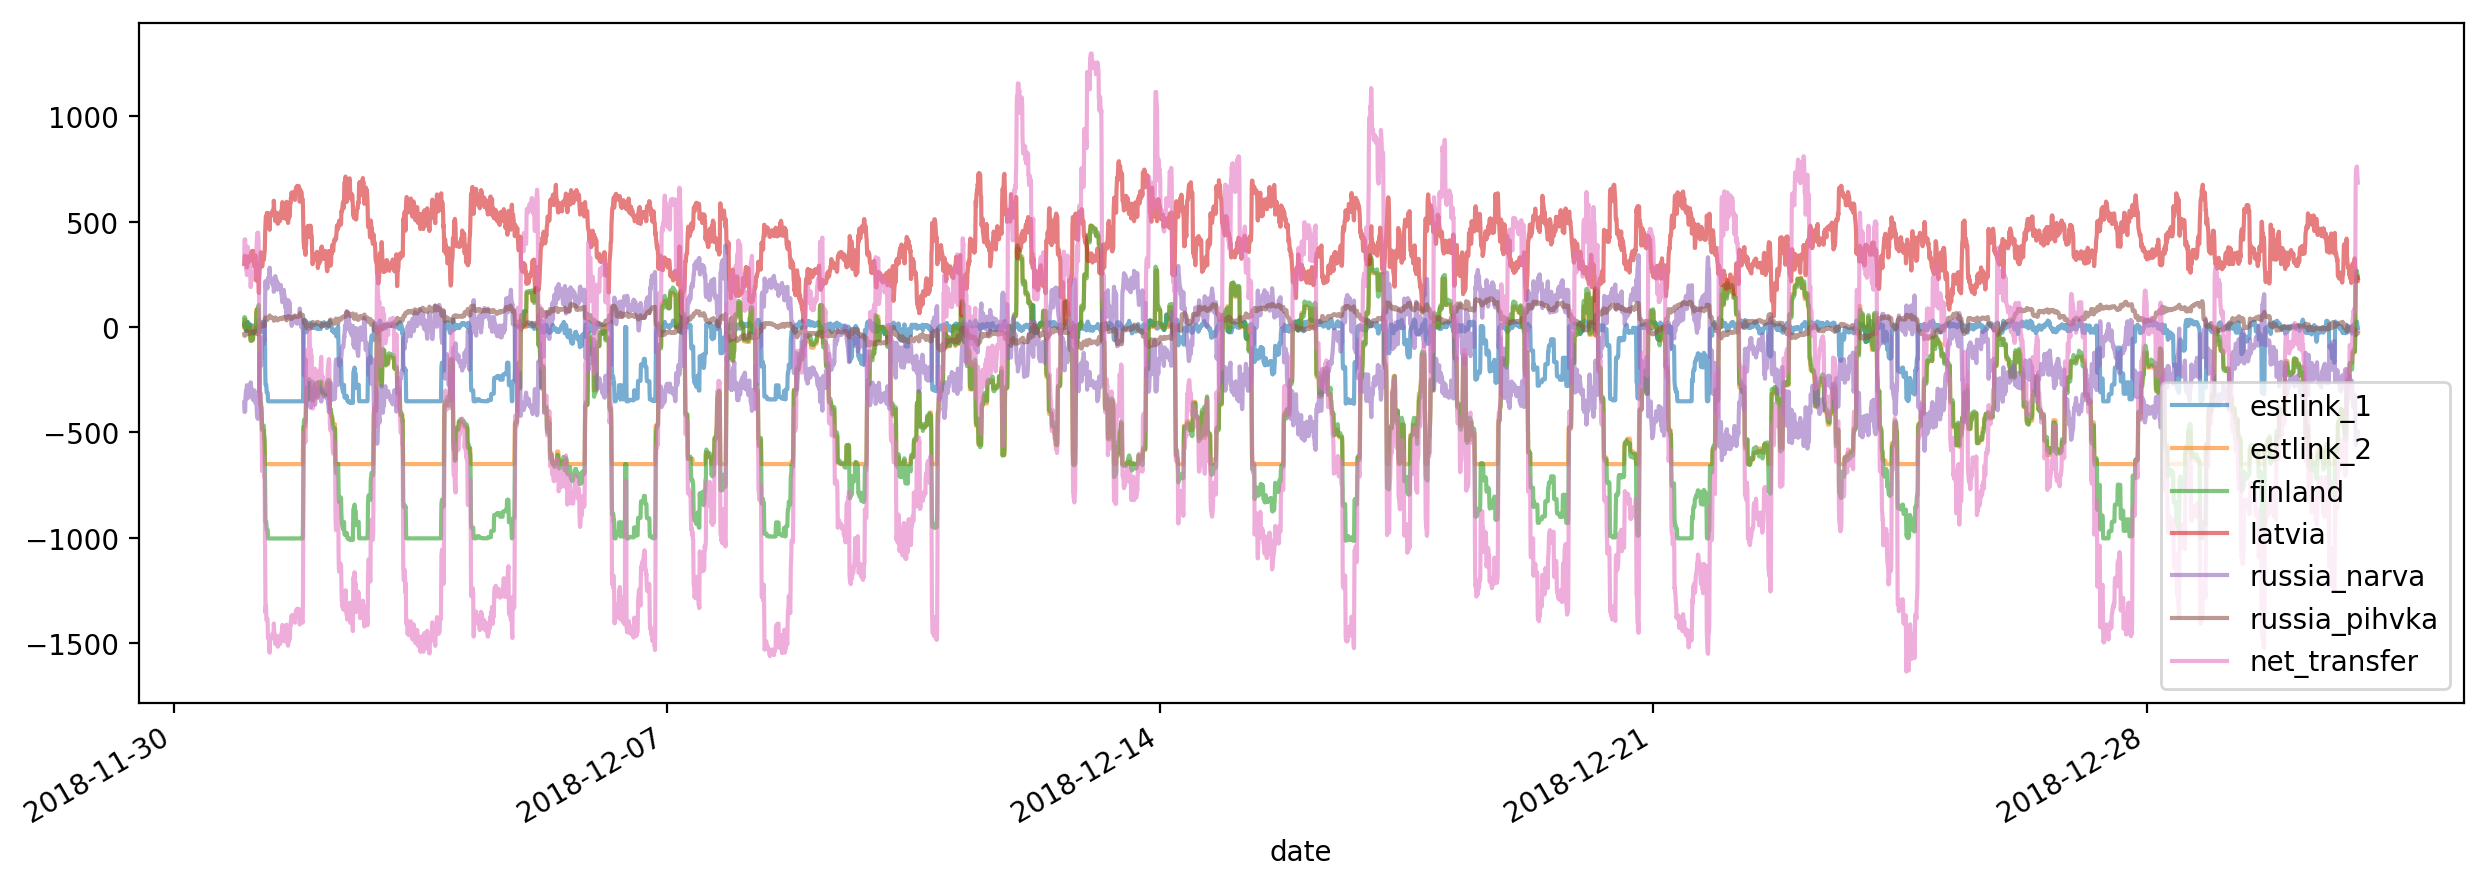

In [18]:
df.loc['2018-12-01 00:00':].plot(alpha=0.6);

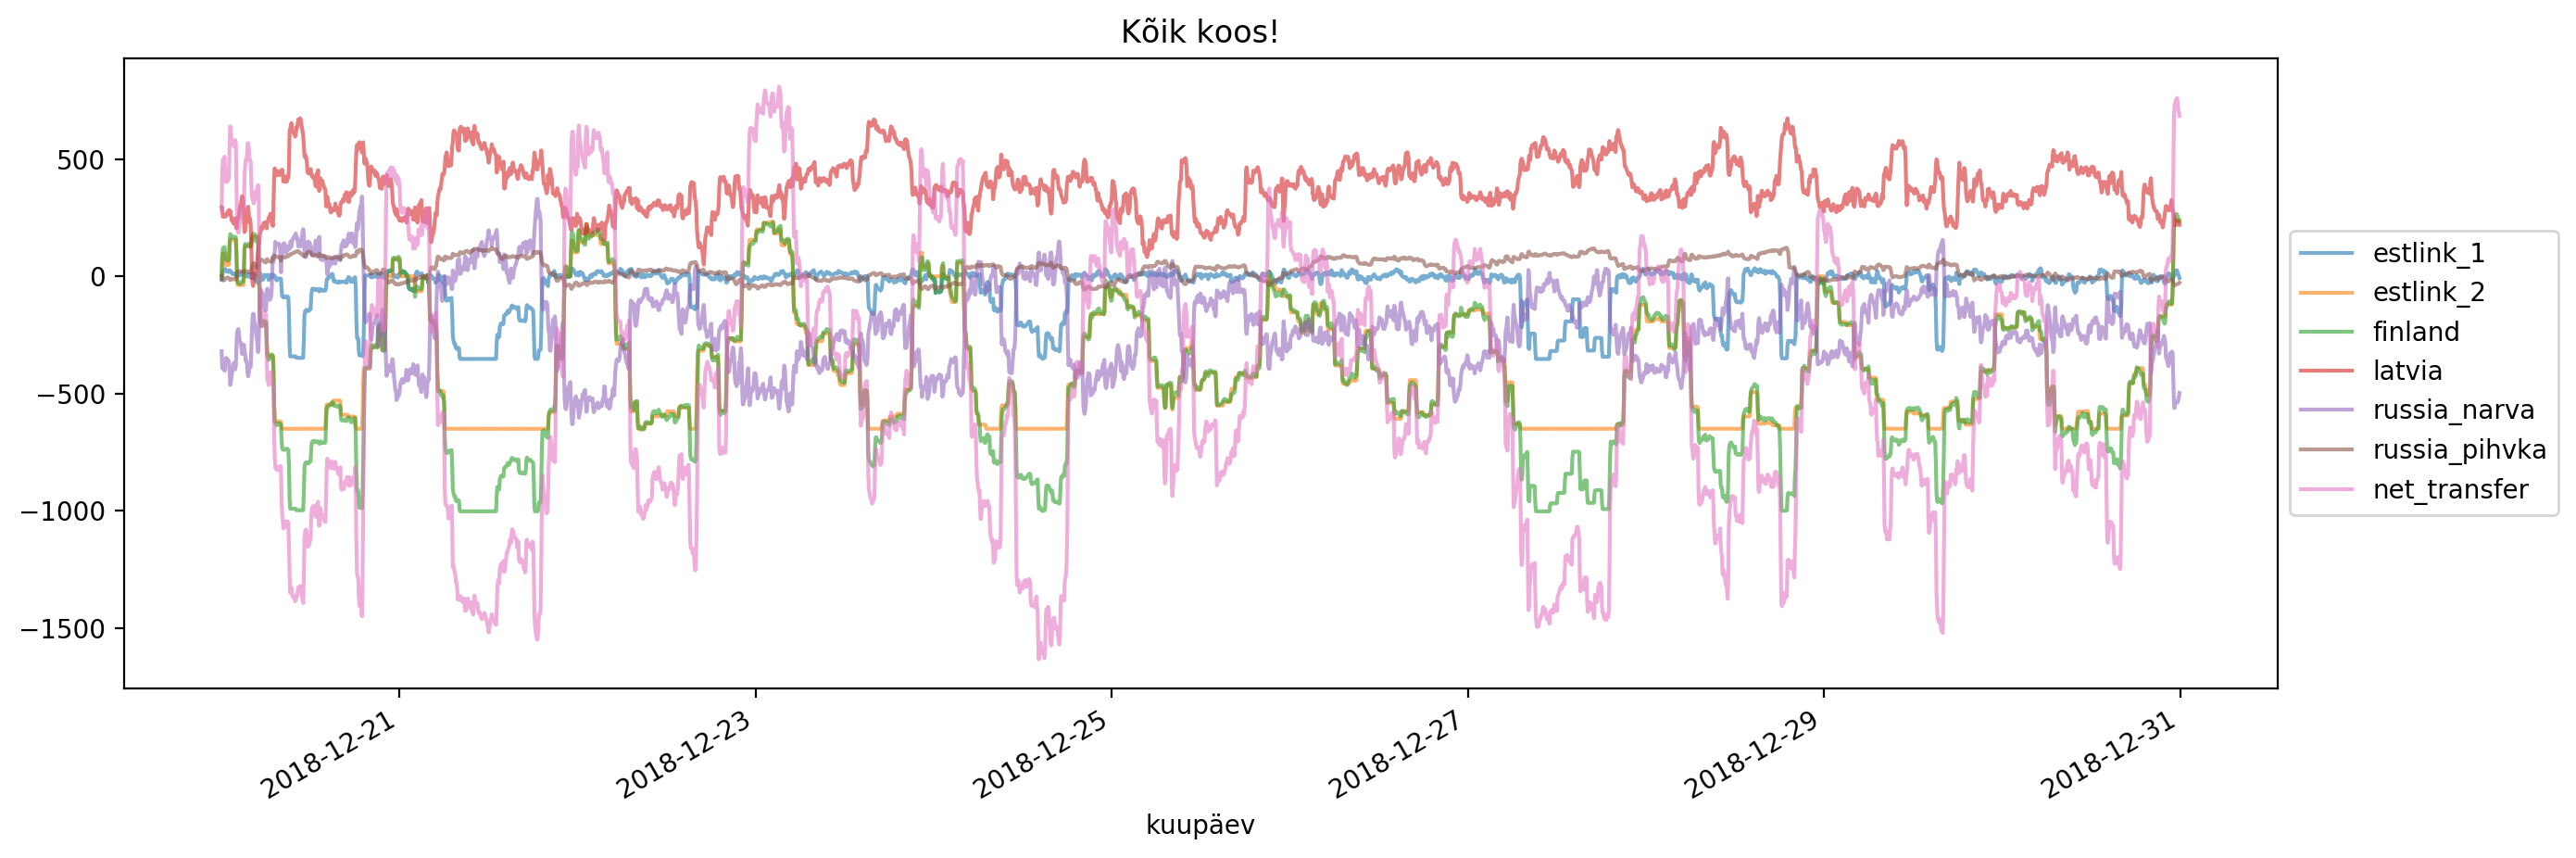

In [19]:
df.loc['2018-12-20 00:00':].plot(alpha=0.6);
plt.title('Kõik koos!', color='black')
plt.xlabel('kuupäev')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


33.54526571466673


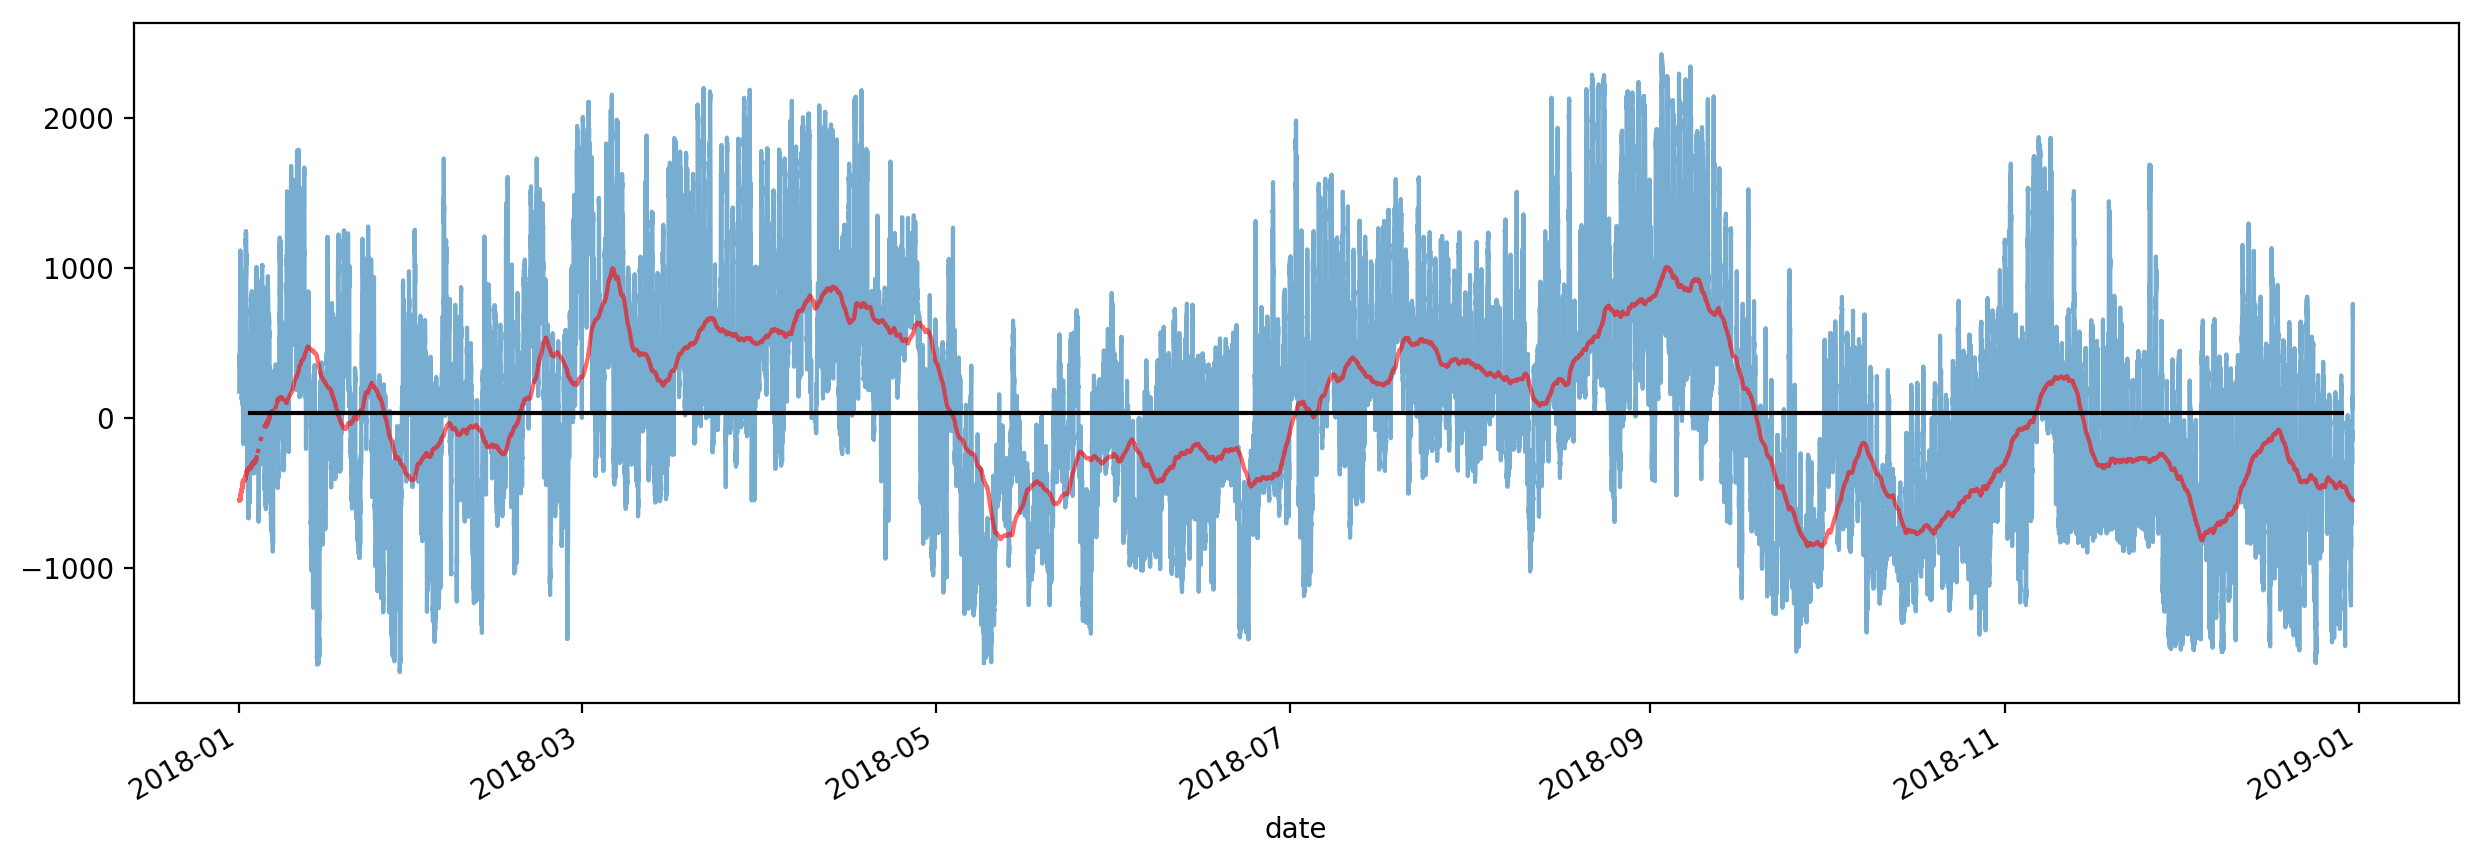

In [20]:
MovingAverage = df.net_transfer.rolling(window=2000).mean()
Tot_average = df.net_transfer.mean()

print(Tot_average)
df.net_transfer.plot(alpha=0.6)
MovingAverage.plot(style='r',alpha=0.6)
plt.axhline(Tot_average, xmin=0.05, xmax=0.95, color='black');

In [21]:
df.head(10)

,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,net_transfer
date,,,,,,,
2018-01-01 00:00:00,-0.7736,-50.5667,-51.3403,278.5500,-173.3333,92.6459,175.869
2018-01-01 00:05:00,0.6140,-51.0000,-50.3860,300.8792,-201.7000,85.0588,200.107
2018-01-01 00:10:00,-0.3930,-16.6333,-17.0263,295.1209,-222.1667,79.4812,261.068
2018-01-01 00:15:00,-7.0241,51.1167,44.0926,288.0245,-273.8500,72.8570,376.21
2018-01-01 00:20:00,-1.3140,54.4667,53.1527,298.9832,-292.7167,76.1738,405.289
2018-01-01 00:25:00,-0.0737,54.4000,54.3263,299.7355,-279.0667,75.3039,408.388
2018-01-01 00:30:00,4.1629,54.4000,58.5629,293.5617,-277.7166,75.5644,410.688
2018-01-01 00:35:00,4.8629,54.4000,59.2629,301.8262,-281.3833,77.4809,420.352
2018-01-01 00:40:00,0.6386,54.4333,55.0719,301.9982,-269.2333,80.6163,412.142


In [22]:
no_net_df = df.drop(columns=['net_transfer'])

In [23]:
no_net_df.fillna(0);

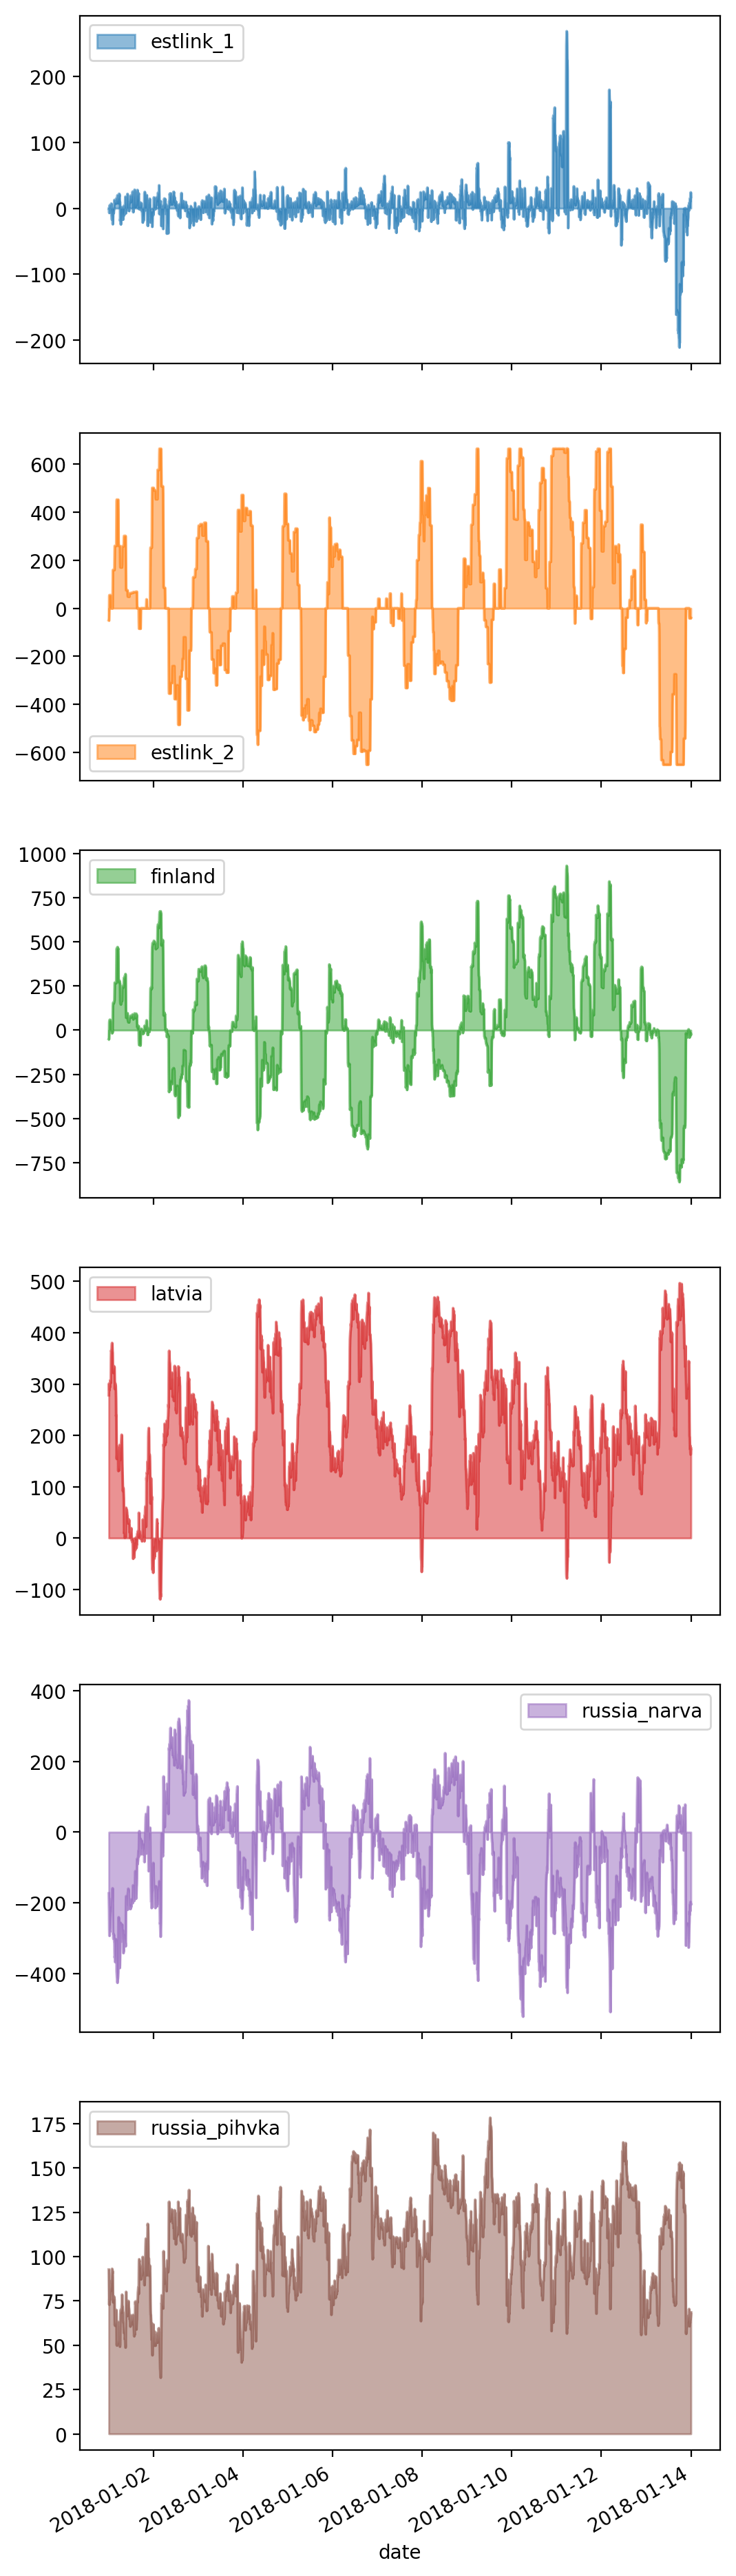

In [24]:
no_net_df.loc[:'2018-01-14 00:00'].plot.area(stacked=False,subplots=True, figsize=(6, 26));


## Näidisprobleem - PROBLEEMI NIMI

Probleemi kirjeldus:

Sisendiks 2017 ja 2018 voolu võrgumahtude andmed

Katsume ennustada 2019 2 esimest nädalat

In [25]:
# testvalim
# api-endpoint 
URL = " http://dashboard.elering.ee/api/transmission/cross-border?"  
# API parameetrid
PARAMS = {'start':'2019-01-01 00:00', 'end': '2019-01-07 00:00'}  

# GET request
r = requests.get(url = URL, params = PARAMS) 
# extracting data in json format 

data = r.json() 

Cross_border_test = pd.DataFrame.from_dict(data['data'])
Cross_border_test.head(5)

,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp
0,48.4076,0.2000,48.6076,108.6291,-116.5667,-12.4774,1546300800
1,32.9471,51.6167,84.5638,98.7344,-134.2833,-10.3686,1546301100
2,32.5665,114.8000,147.3665,119.9952,-205.7500,-16.7919,1546301400
3,29.7543,114.9000,144.6543,120.9410,-186.3667,-13.8551,1546301700
4,22.8776,114.8667,137.7443,116.3312,-168.3167,-11.3110,1546302000


In [26]:
Cross_border_test['net_transfer'] =   Cross_border_test.values[:, :5].sum(1)
Cross_border_test.describe()

,estlink_1,estlink_2,finland,latvia,russia_narva,russia_pihvka,timestamp,net_transfer
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1.728000e+03,1728.000000
mean,-13.959892,-168.020092,-181.979984,366.110513,-243.091966,-12.808564,1.546560e+09,-240.941421
std,57.133291,318.786566,347.091564,161.839763,144.565146,21.680438,1.496925e+05,456.387055
min,-348.087800,-650.300000,-997.687800,0.000000,-572.050000,-76.396600,1.546301e+09,-1255.949300
25%,-10.207675,-395.649975,-403.288975,261.332550,-349.216625,-31.806275,1.546430e+09,-597.128675
50%,1.565700,-162.350000,-163.427450,357.824100,-244.233350,-12.416000,1.546560e+09,-244.638850
75%,9.716475,0.400000,38.152150,457.503150,-143.712525,4.668675,1.546689e+09,82.653225
max,49.021600,664.066700,688.003600,842.129900,149.483300,52.024600,1.546819e+09,926.914300


In [27]:
Cross_border_test['date'] = pd.to_datetime(Cross_border_test['timestamp'], unit='s')

Cross_border_test.drop(['timestamp'], axis=1, inplace=True)
Cross_border_test['date'] = pd.to_datetime(Cross_border_test['date'])
Cross_border_test = Cross_border_test.set_index(['date'], drop=True)

### Lihtsad mudelid
Autoregressive integrated moving average

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

In [54]:
train = df.net_transfer.values
test = Cross_border_test.net_transfer.values

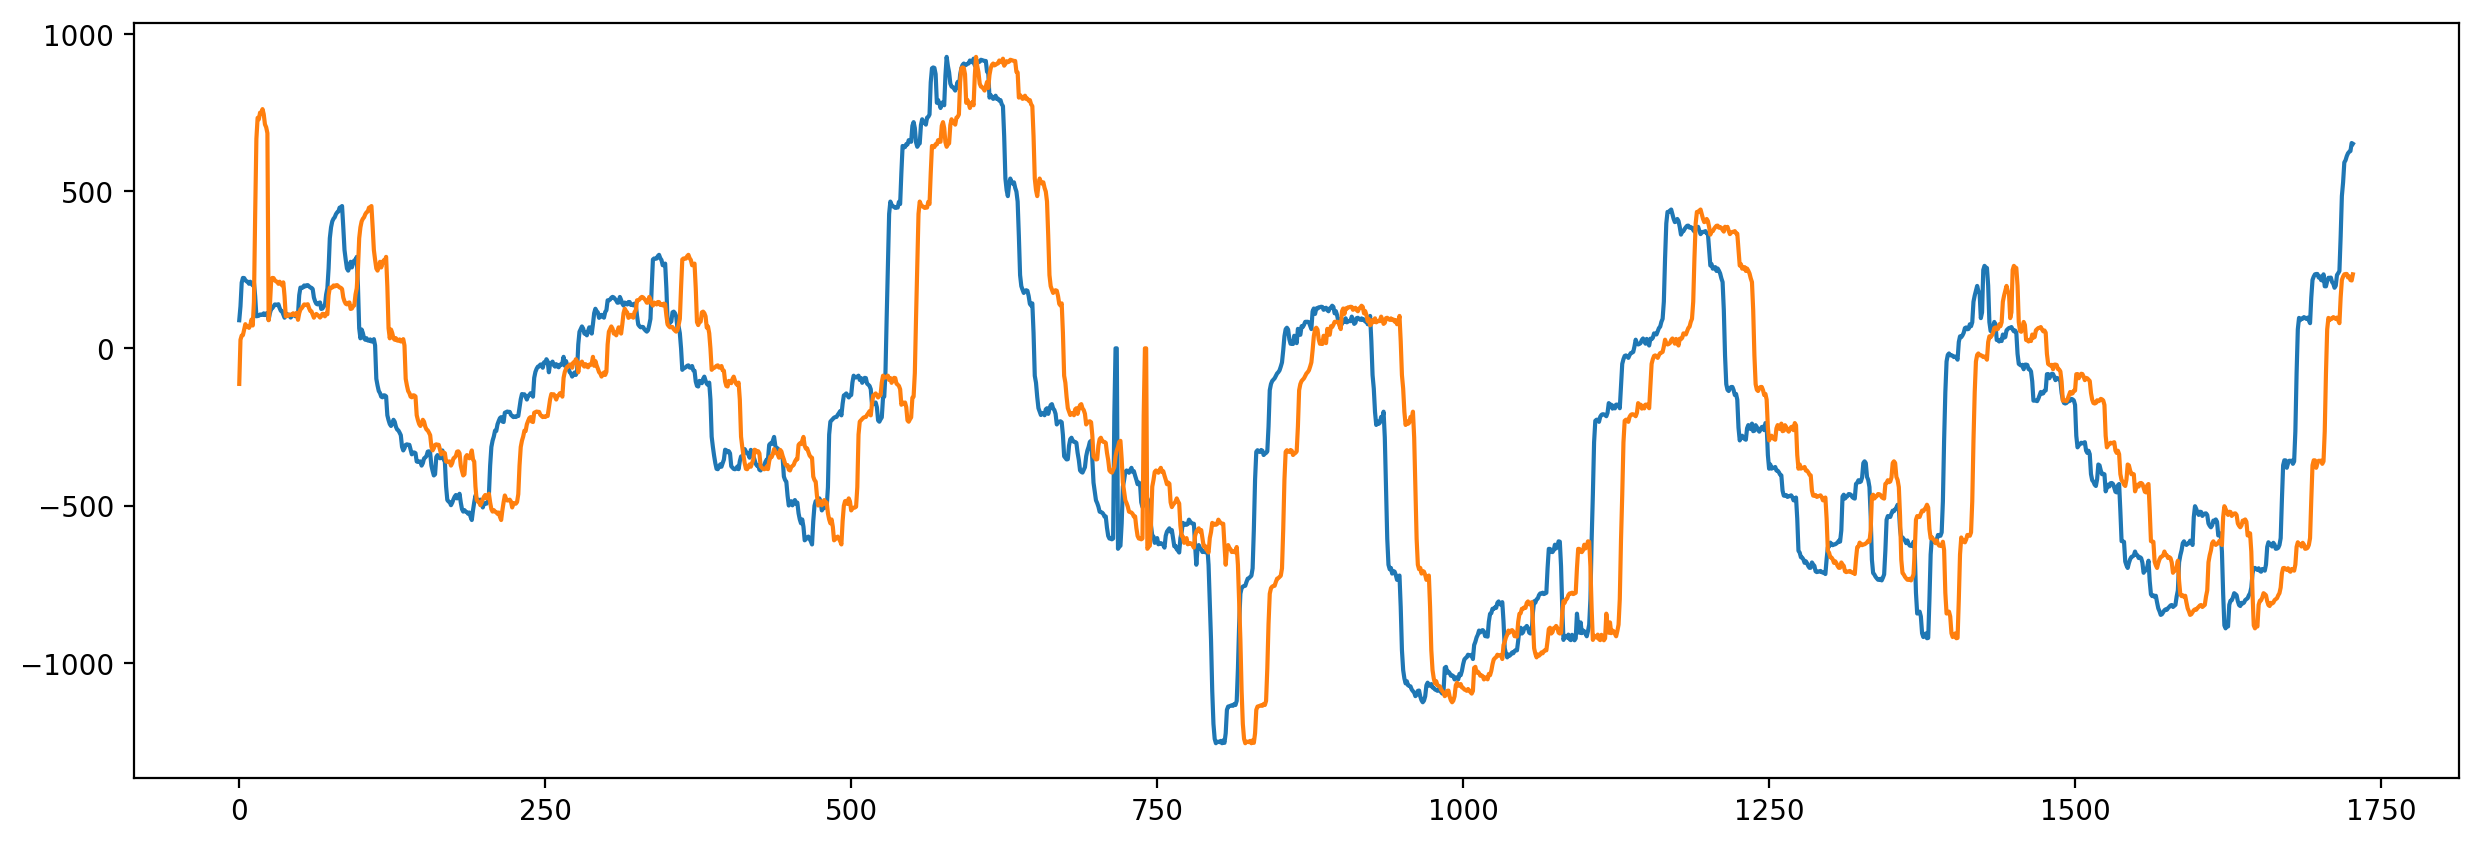

In [57]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    yhat = history[-24]
    predictions.append(yhat)
    # observation
    history.append(test[i])
# plot predictions vs observations
plt.plot(test)
plt.plot(predictions)
plt.show()

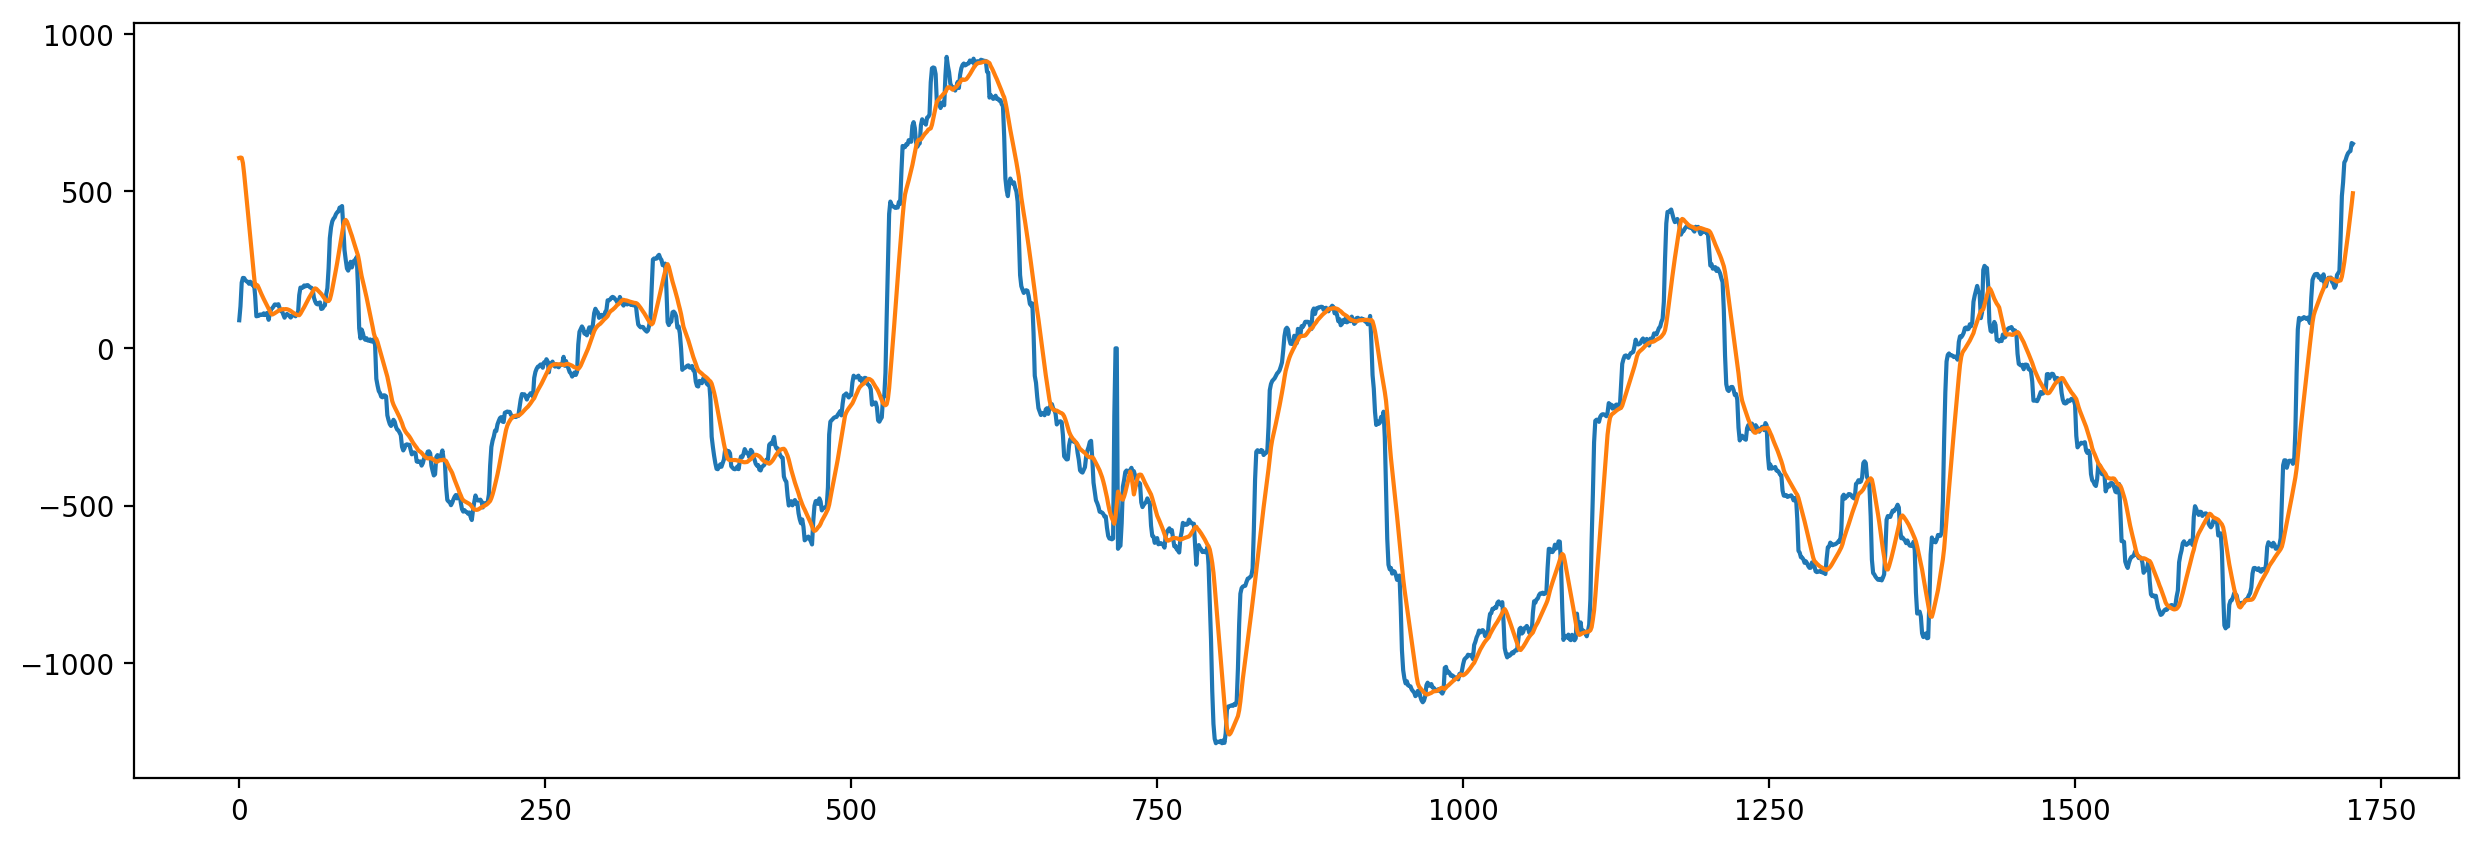

In [60]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from numpy import mean
# load data

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    yhat = mean(history[-13:])
    predictions.append(yhat)
    # observation
    history.append(test[i])
# plot predictions vs observations
plt.plot(test)
plt.plot(predictions)
plt.show()



In [64]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:               209663
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1108522.514
Method:                       css-mle   S.D. of innovations             47.857
Date:                Wed, 20 Feb 2019   AIC                        2217059.029
Time:                        00:40:20   BIC                        2217130.802
Sample:                             1   HQIC                       2217080.110
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.175      0.014      0.989      -0.341       0.346
ar.L1.D.y      0.5648      0.002    258.649      0.000       0.561       0.569
ar.L2.D.y     -0.1493      0.003    -59.528      0.0

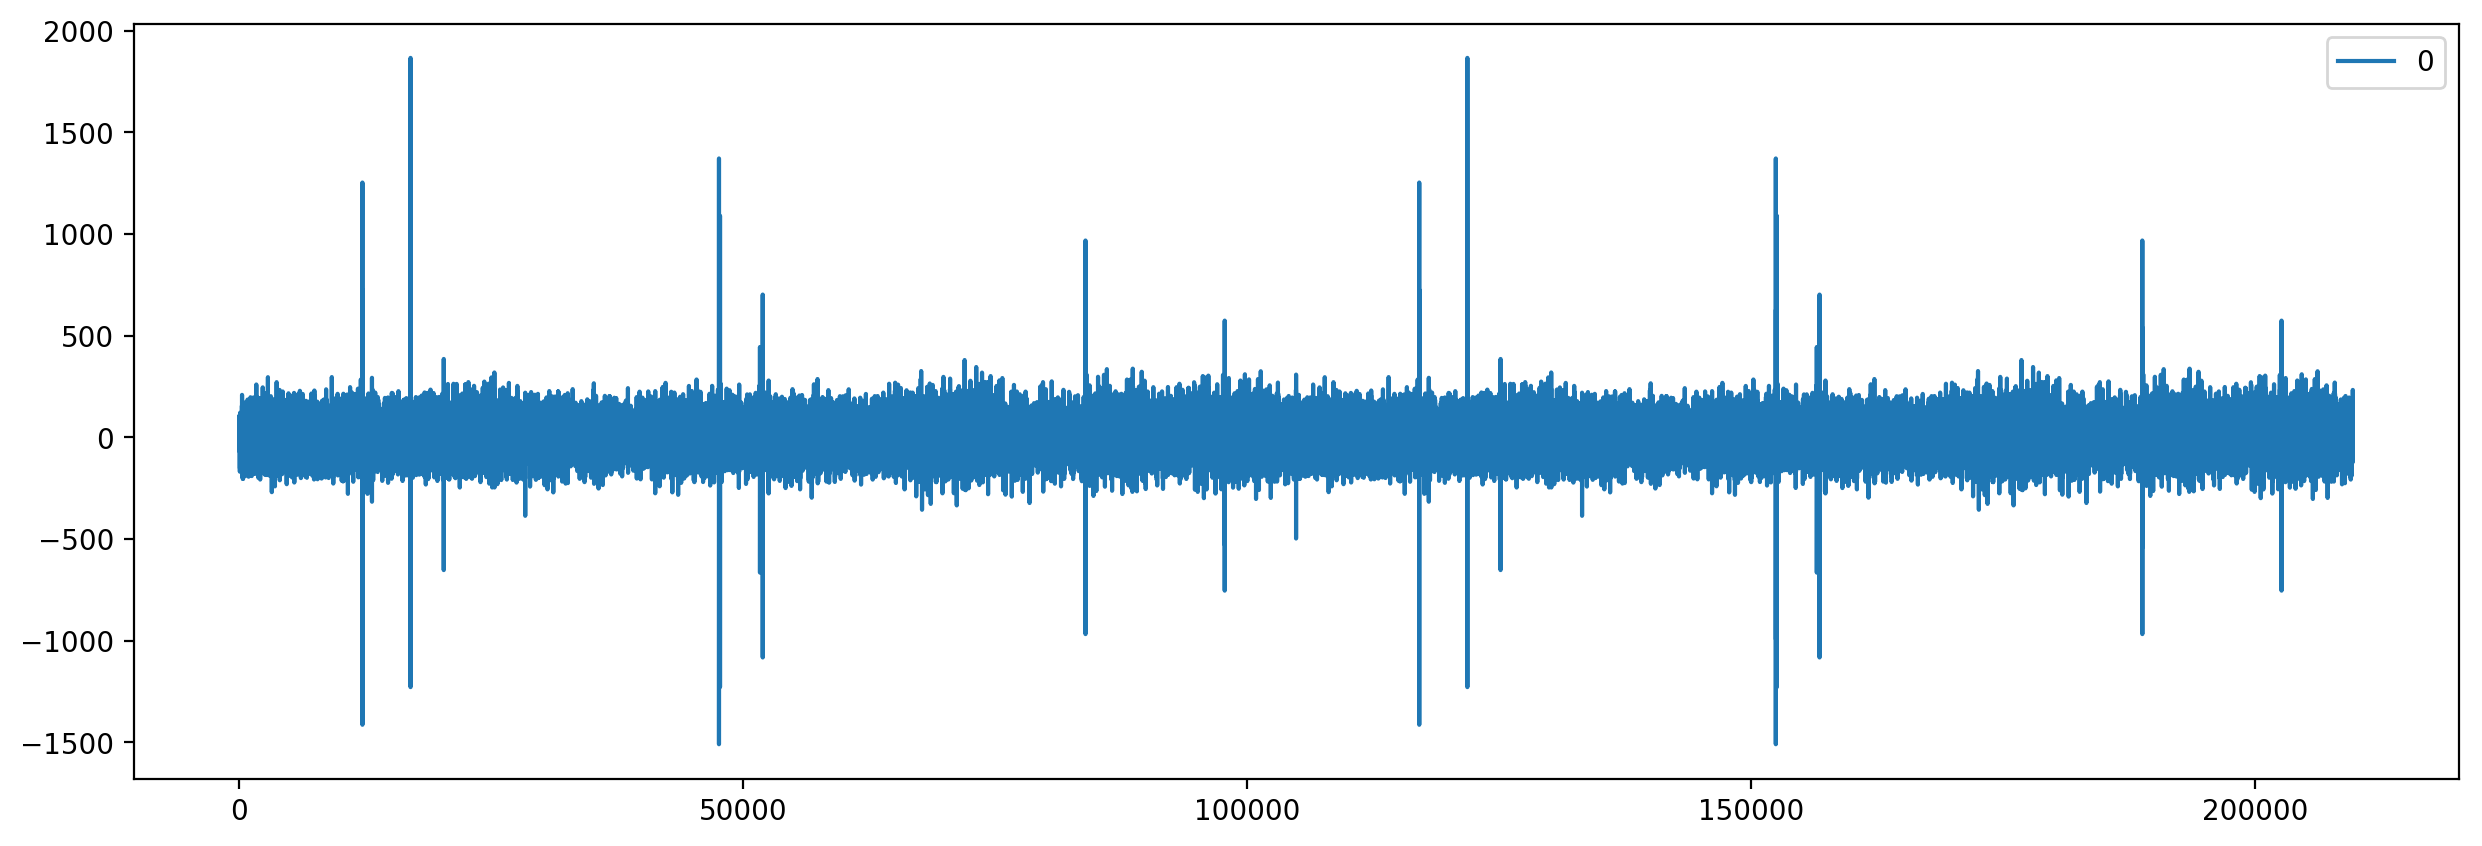

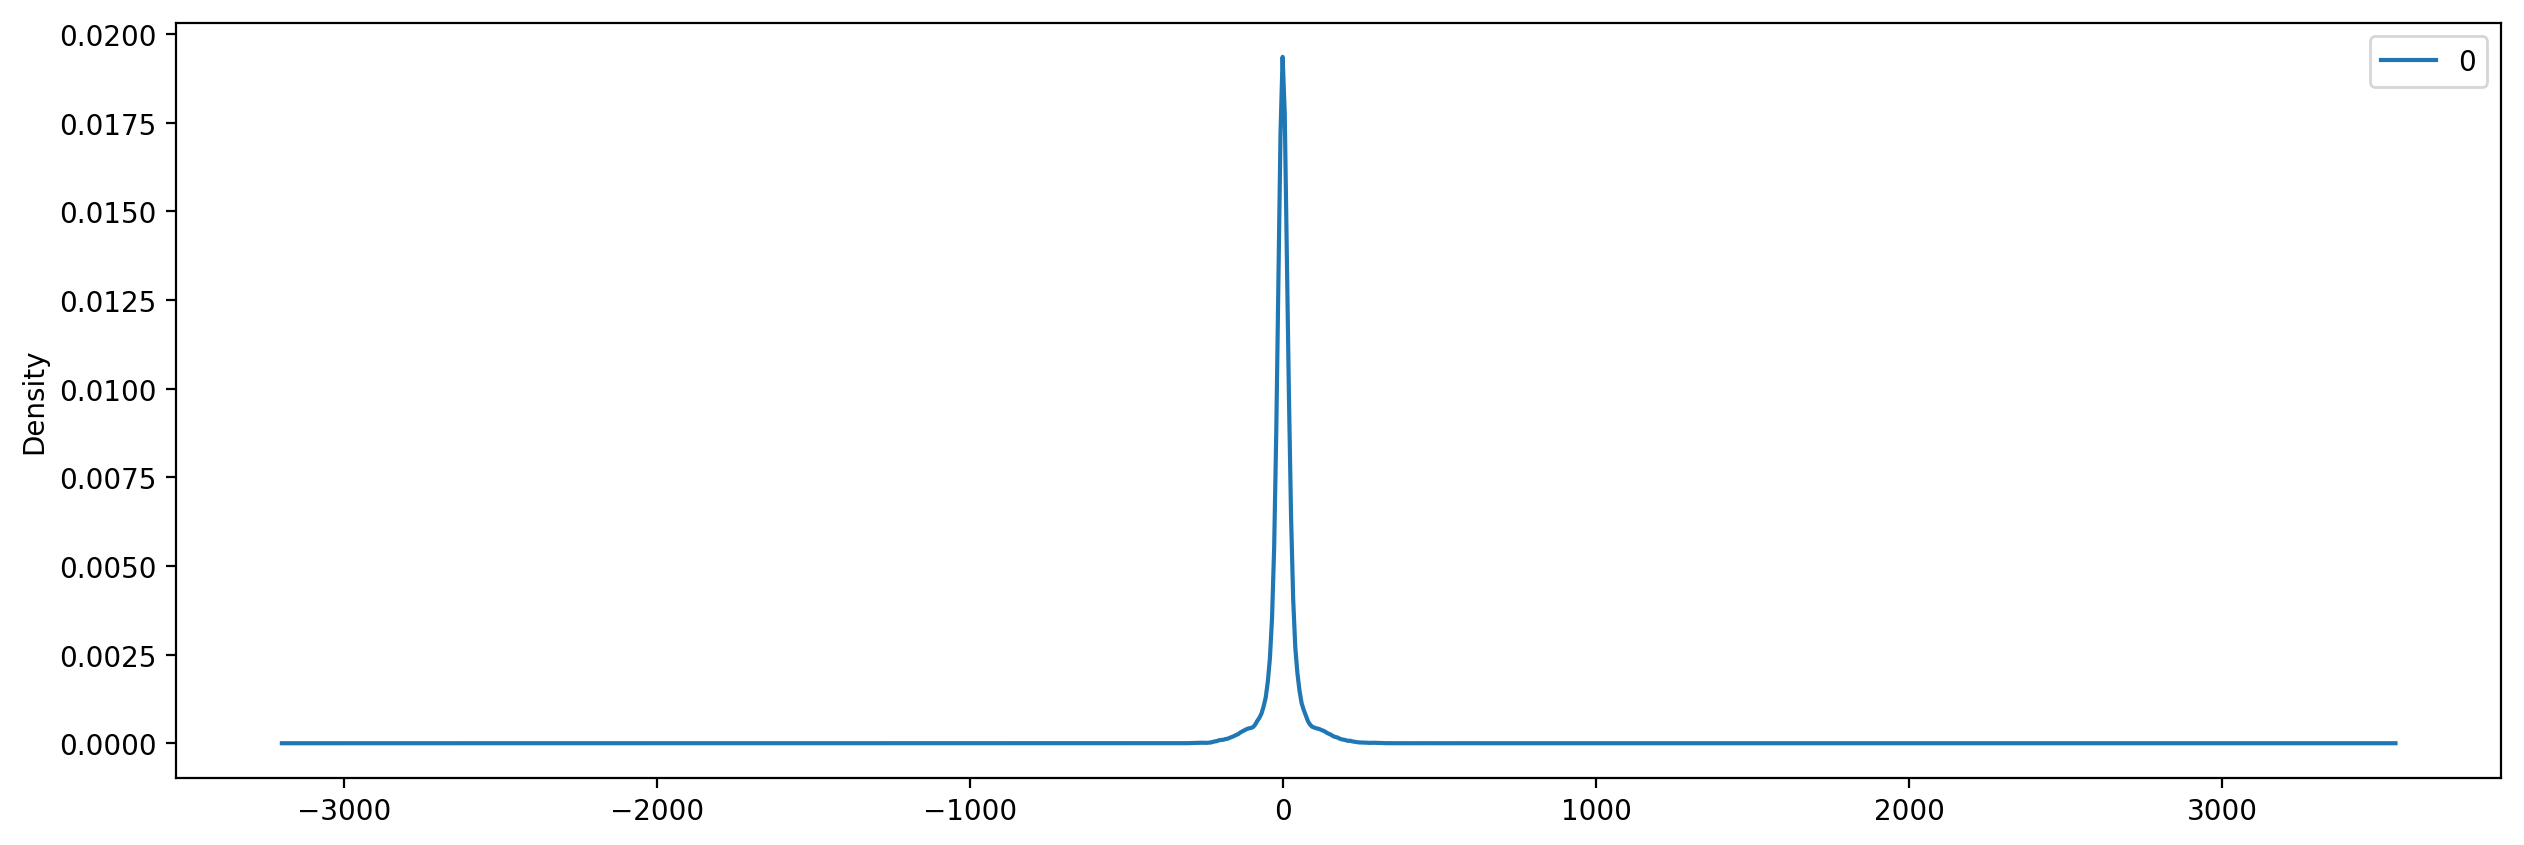

                   0
count  209663.000000
mean       -0.000016
std        47.857439
min     -1510.079365
25%       -14.814315
50%        -0.402203
75%        14.199823
max      1865.496370


In [65]:
# fit model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

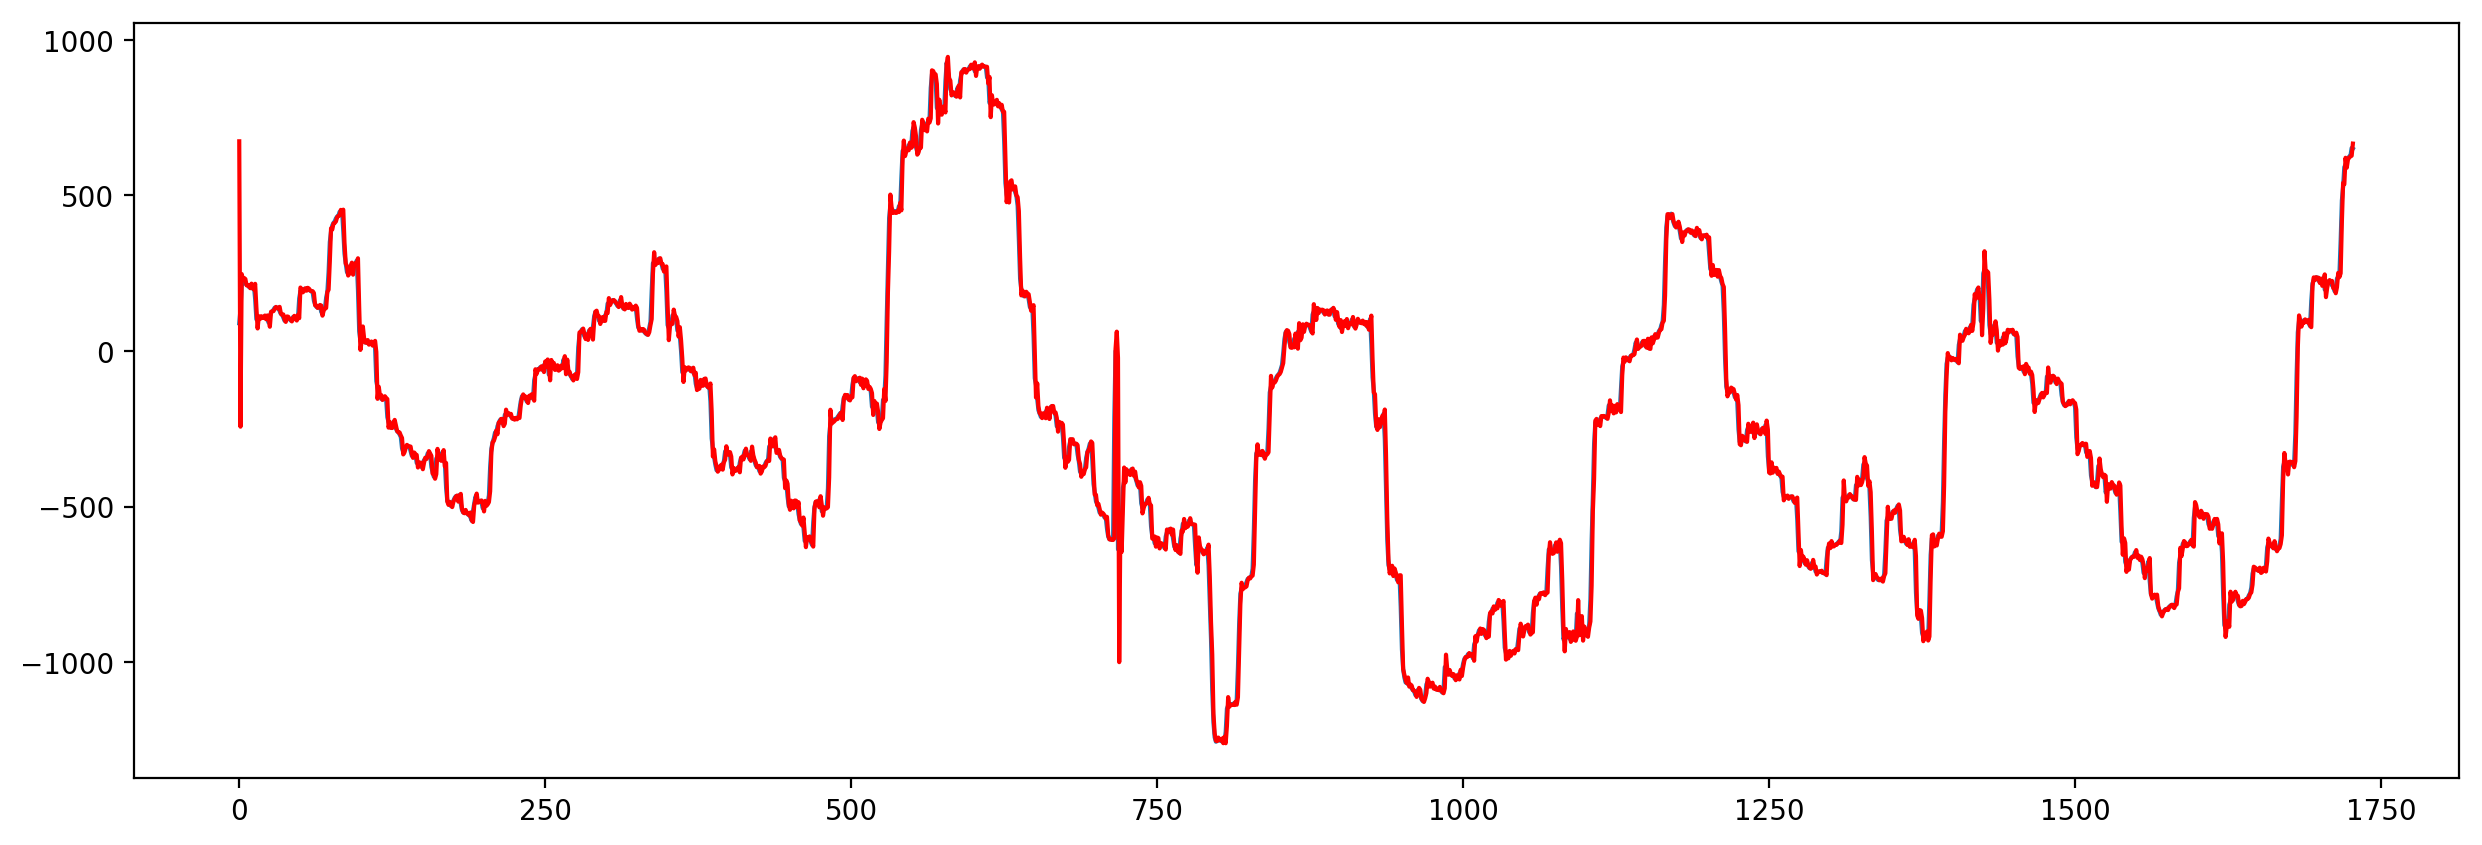

In [67]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tiit/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

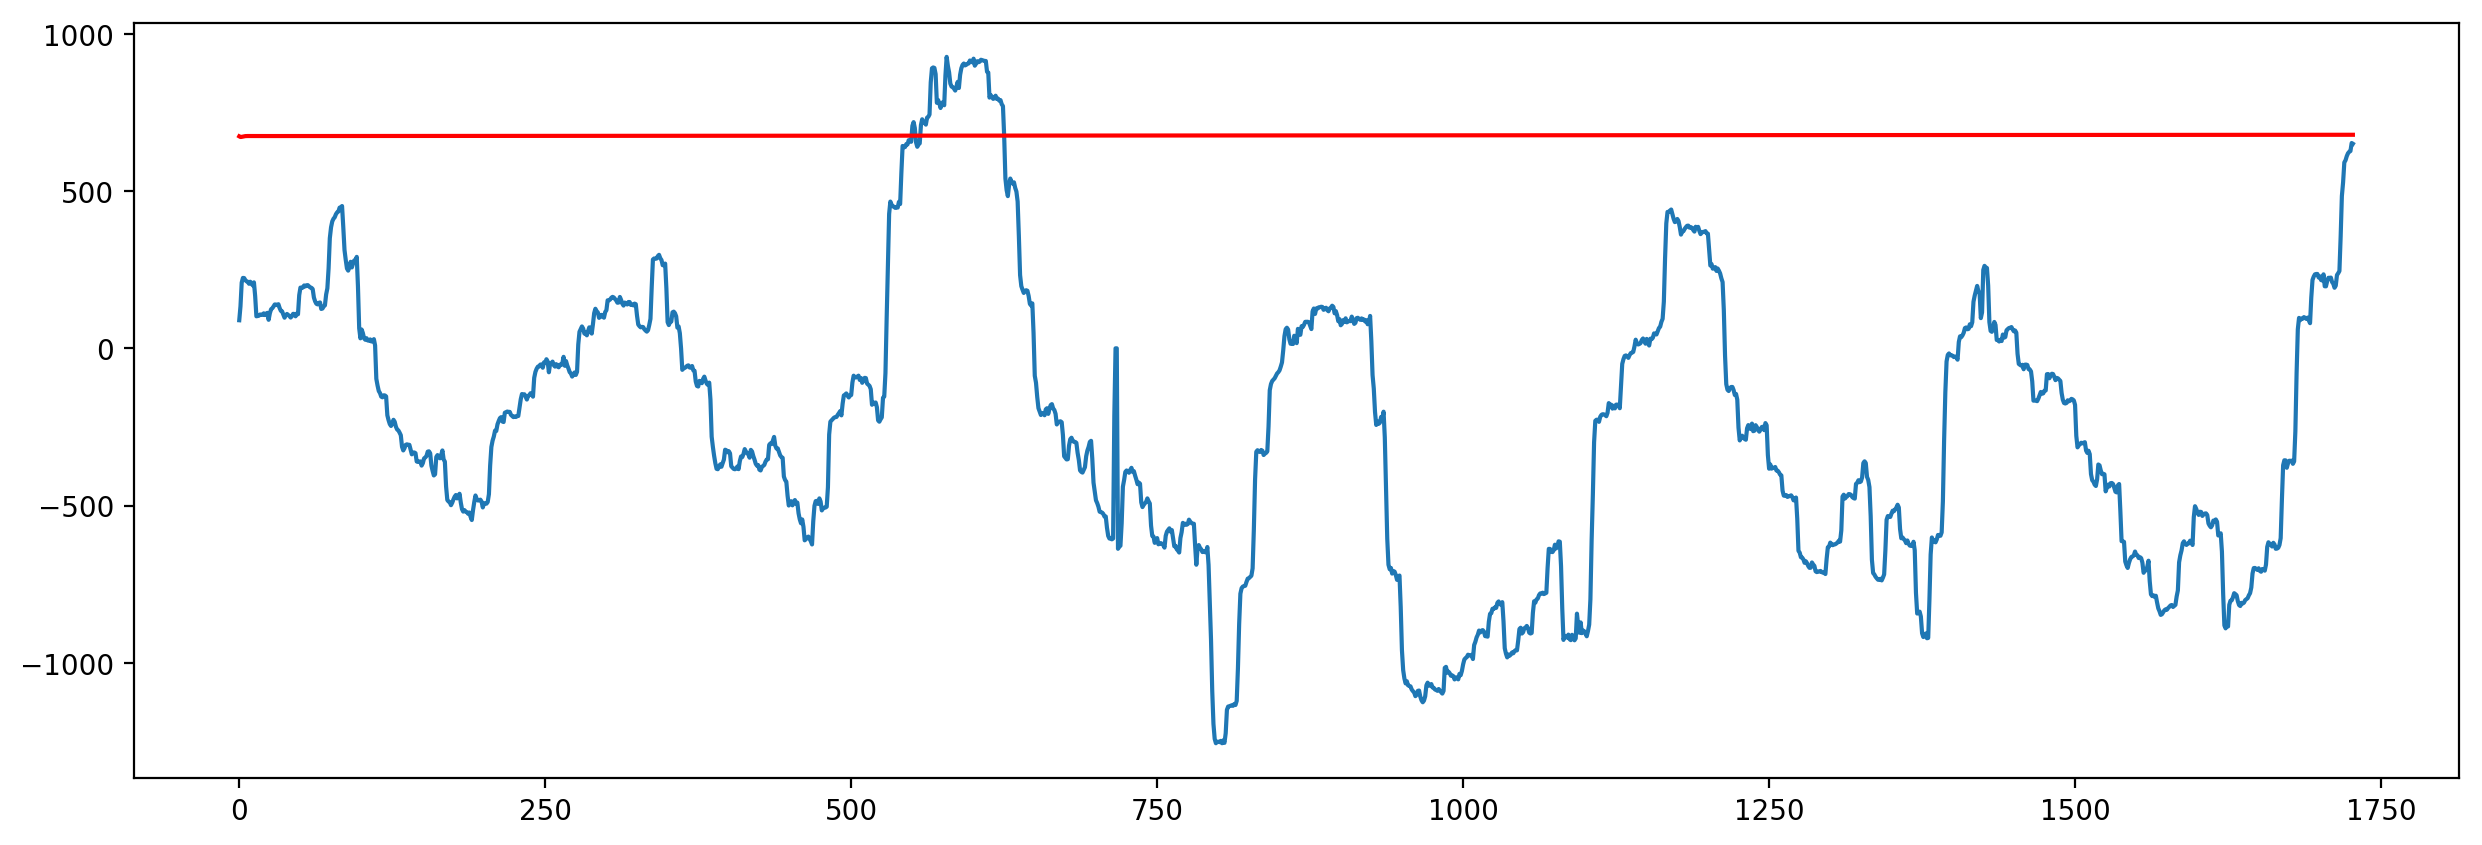

In [68]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Artificial Neural Network (ANN) and Long Short-Term Memory Recurrent Neural Network (LSTM RNN) 

In [31]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

/home/tiit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
train = df.net_transfer
test = Cross_border_test.net_transfer

#test.head()
#train.head()
print(train.shape)
print(test.shape)

(209664,)
(1728,)


### Normeerime data ja valmistame selle ette

In [33]:
# prepare data for normalization
def reshaper(series):
    values = series.values
    values = values.reshape((len(values), 1))
    return values

scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(reshaper(train));
test_sc = scaler.transform(reshaper(test));

/home/tiit/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Närvivõrgud

Teeme Sequqential mudeli

.add lisab uusi kihte




In [35]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
209663/209663 [==============================] - 109s 522us/step - loss: 0.0010
Epoch 2/100
209663/209663 [==============================] - 108s 517us/step - loss: 9.4476e-04
Epoch 3/100
209663/209663 [==============================] - 98s 469us/step - loss: 9.3674e-04
Epoch 4/100
209663/209663 [==============================] - 96s 459us/step - loss: 9.3512e-04
Epoch 5/100
209663/209663 [==============================] - 96s 460us/step - loss: 9.3501e-04
Epoch 6/100
209663/209663 [==============================] - 96s 459us/step - loss: 9.3662e-04
Epoch 7/100
209663/209663 [==============================] - 96s 459us/step - loss: 9.3755e-04
Epoch 00007: early stopping


In [36]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.976
The R2 score on the Test set is:	0.950


### LSTM

In [37]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (209663, 1, 1)
Test shape:  (1727, 1, 1)


/home/tiit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/tiit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/tiit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/tiit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


The LSTM networks creation and model compiling is similar with those of ANN’s.

    The LSTM has a visible layer with 1 input.
    A hidden layer with 7 LSTM neurons.
    An output layer that makes a single value prediction.
    The relu activation function is used for the LSTM neurons.
    The LSTM is trained for 100 epochs and a batch size of 1 is used.

In [38]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
209663/209663 [==============================] - 237s 1ms/step - loss: 0.0011
Epoch 2/100
209663/209663 [==============================] - 234s 1ms/step - loss: 9.4688e-04
Epoch 3/100
209663/209663 [==============================] - 237s 1ms/step - loss: 9.3081e-04
Epoch 4/100
209663/209663 [==============================] - 246s 1ms/step - loss: 9.2741e-04
Epoch 5/100
209663/209663 [==============================] - 266s 1ms/step - loss: 9.2454e-04
Epoch 6/100
209663/209663 [==============================] - 263s 1ms/step - loss: 9.2227e-04
Epoch 7/100
209663/209663 [==============================] - 264s 1ms/step - loss: 9.2081e-04
Epoch 8/100
209663/209663 [==============================] - 264s 1ms/step - loss: 9.2011e-04
Epoch 9/100
209663/209663 [==============================] - 271s 1ms/step - loss: 9.1949e-04
Epoch 10/100
209663/209663 [==============================] - 284s 1ms/step - loss: 9.1895e-04
Epoch 11/100
209663/209663 [==============================] - 2

In [40]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.978
The R2 score on the Test set is:	0.968


In [41]:
# Võrdleme tulemusi

nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

1727/1727 [==============================] - 1s 390us/step
NN: 0.002470
LSTM: 0.001583


#### Tulemused

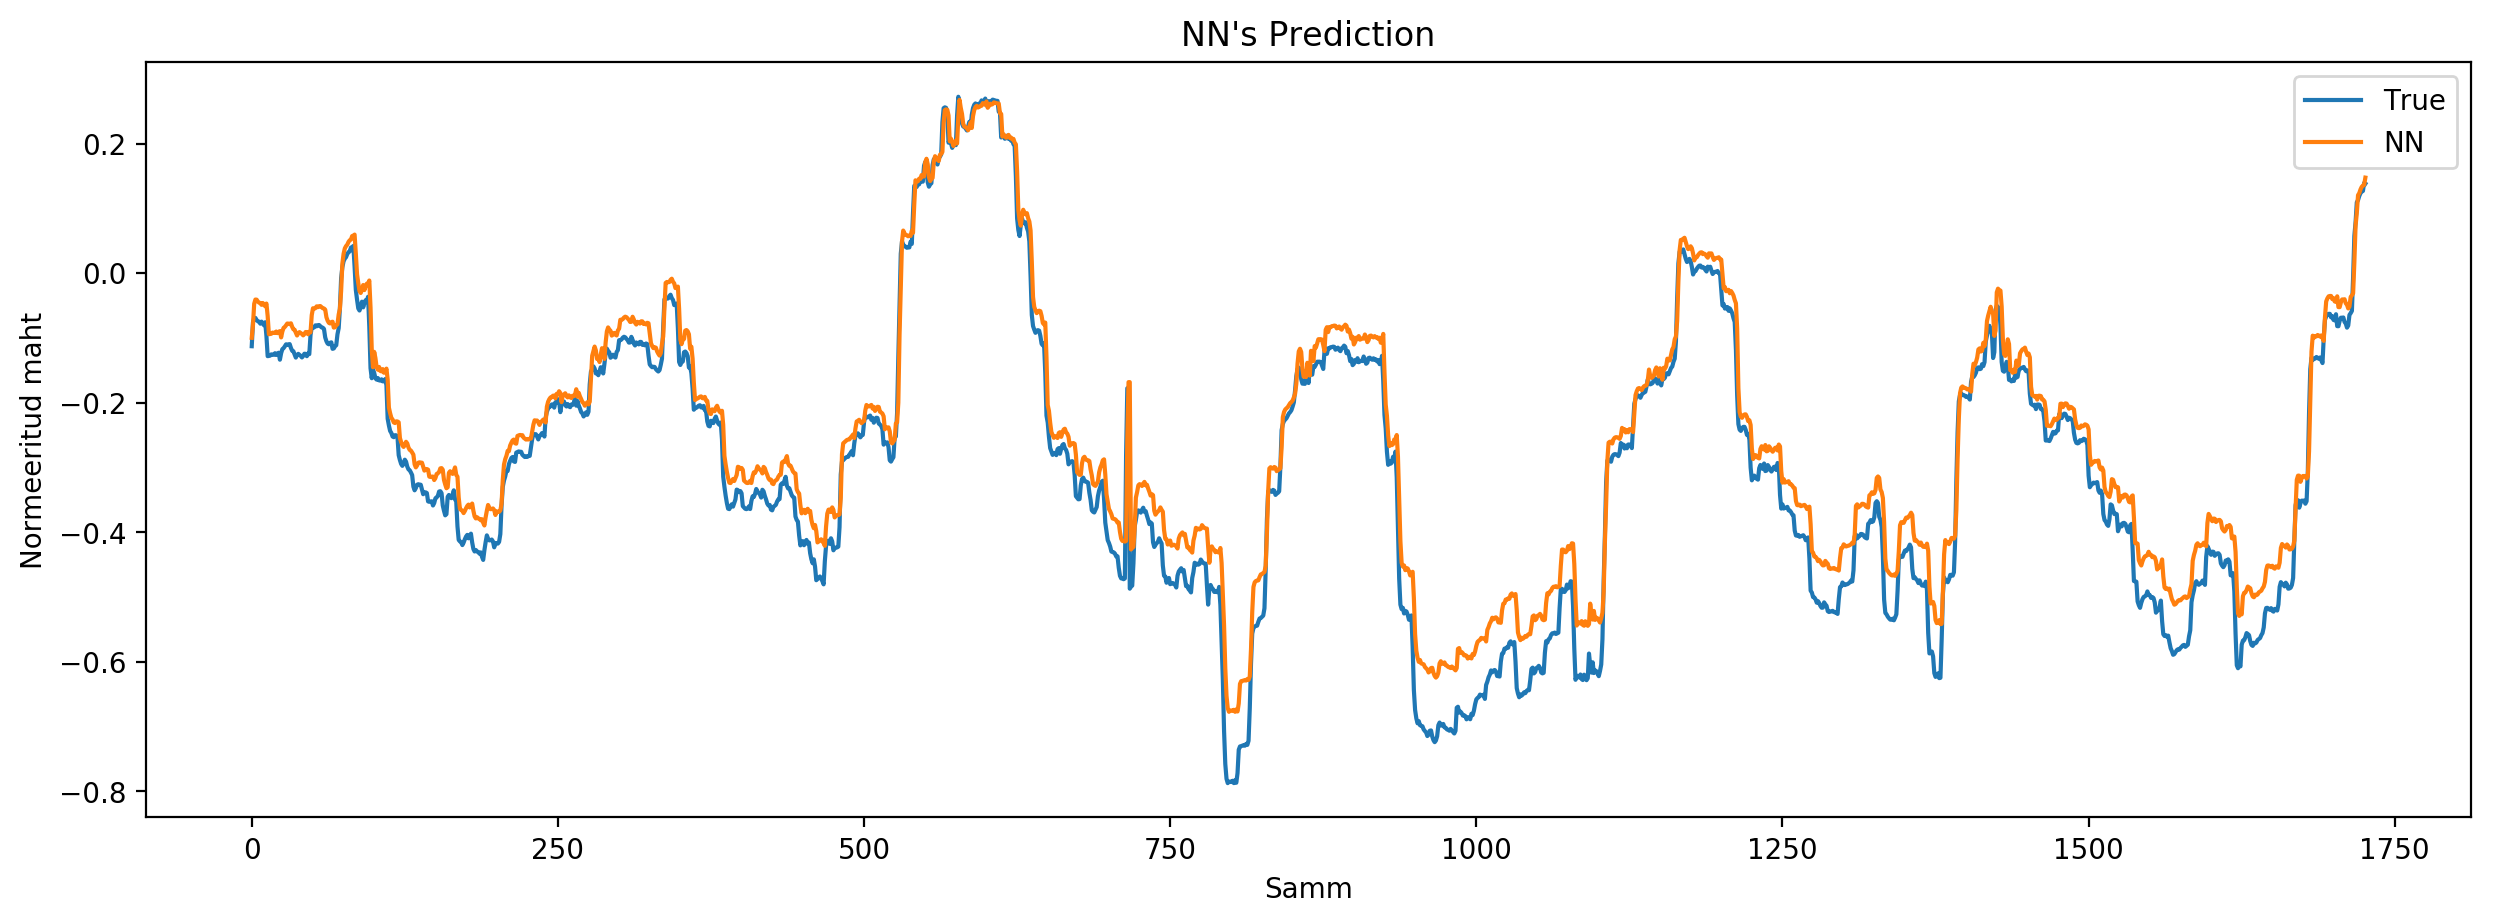

In [47]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Samm')
plt.ylabel('Normeeritud maht')
plt.legend()
plt.show();

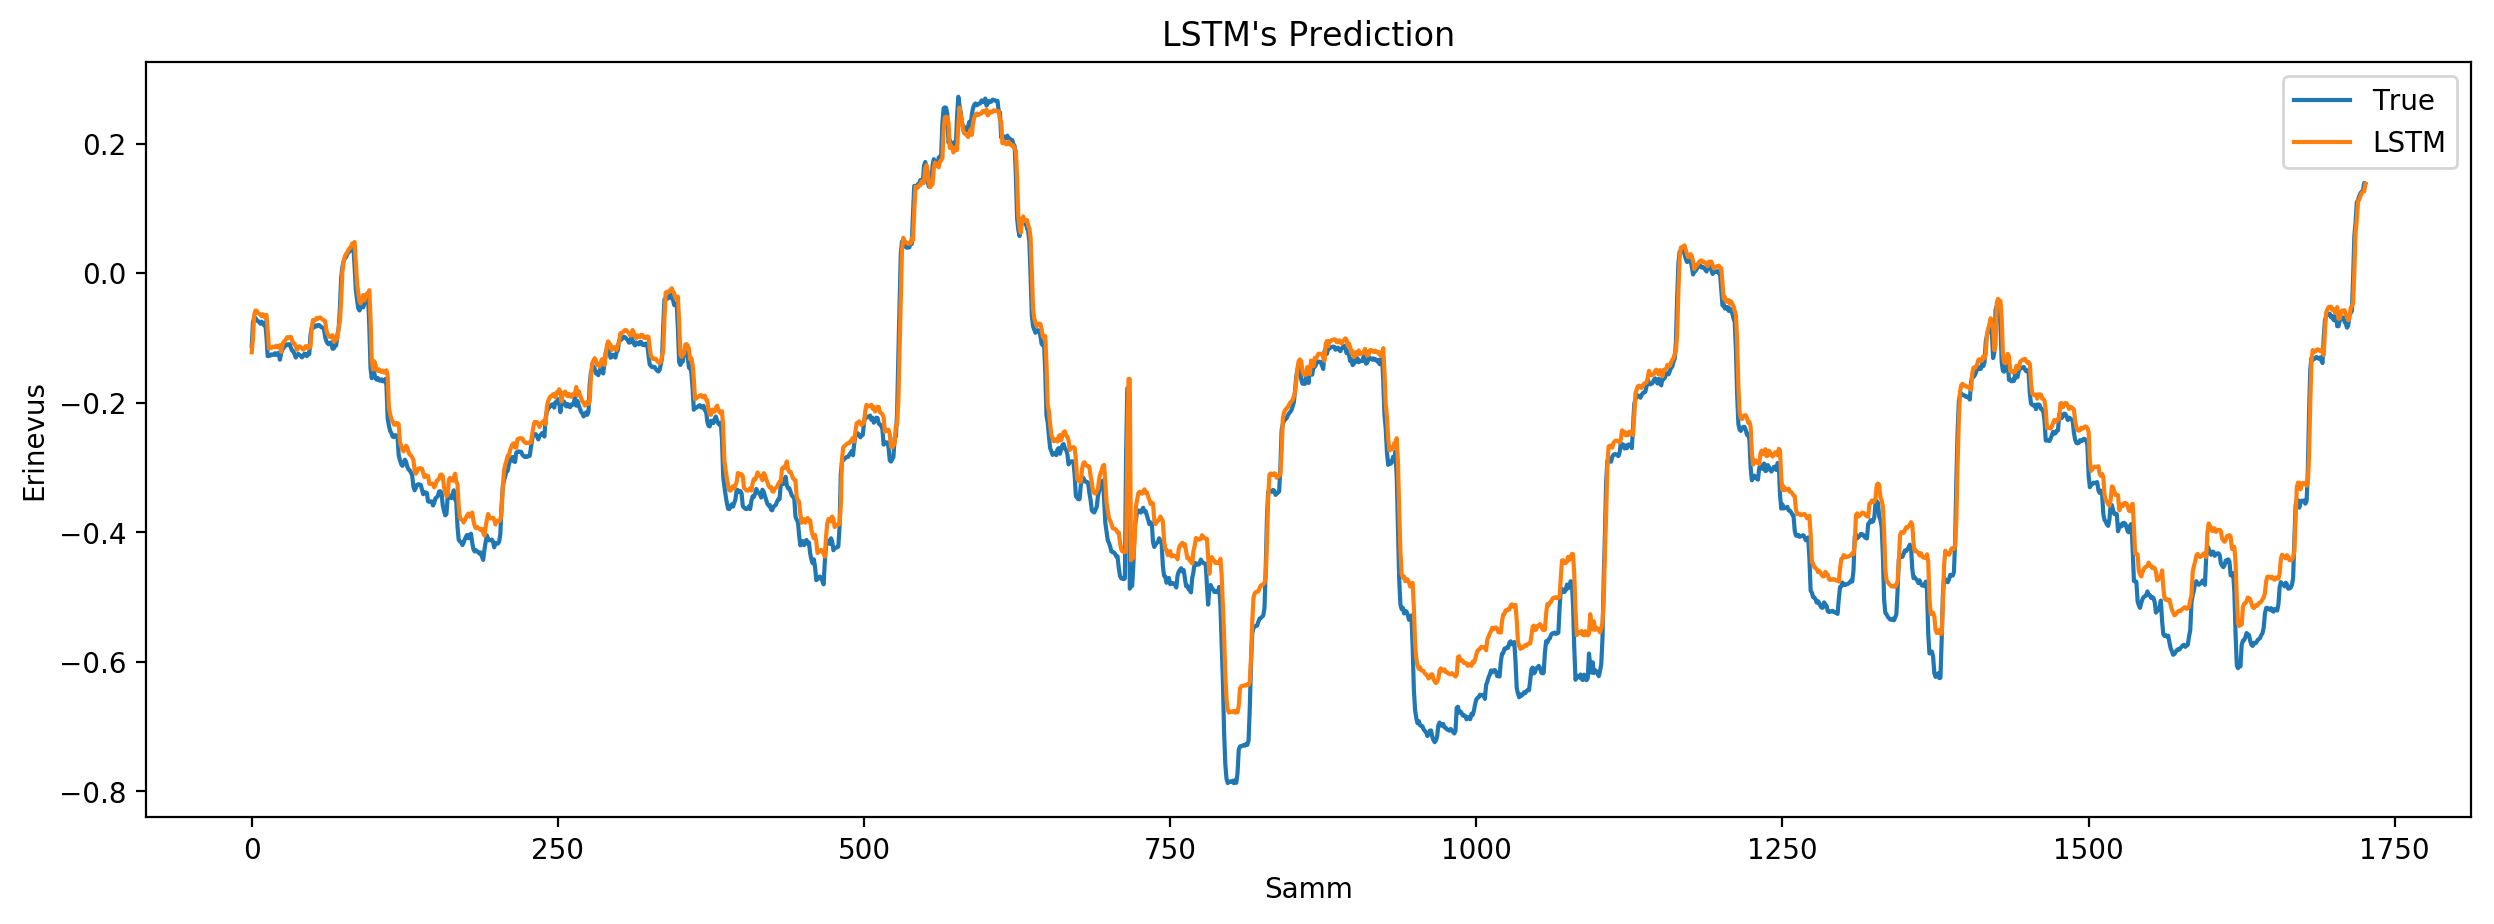

In [45]:
#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Samm')
plt.ylabel('Normeeritud maht')
plt.legend()
plt.show();